<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 3</h2><br/>
<h1>Boosting</h1>
<br/><br/>
    <b>Instructor Principal:</b> Jesus Ortiz jortizs@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Daniela Blanco dblanco@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Boosting

- Al igual que Bagging, el **Boosting** se encuentra en la categoría de métodos de **aprendizaje ensamblado**.
- Bagging entrena un mismo modelo con **diferentes subsets de datos de entrenamiento**. (ej. Random Forest)
- Boosting son aquellos métodos enfocados en **combinar** múltiples modelos débiles en un único modelo más robusto.
- Otra diferencia radica en que bagging realiza entrenamientos de sus modelos en **paralelo**, mientras que boosting entrena sus modelos de manera **secuencial**

**Bagging**
<img src="images/bagging.png" alt="" width="500px"/>

**Boosting**
<img src="images/boosting.png" alt="" width="500px"/>

# AdaBoost (Adaptive Boosting)

- Cada predictor corrige al predictor antecesor poniendo mayor atención a las instancias mal clasificadas.
- AdaBoost incrementa el peso relativo de los datos de entrenamiento mal clasificados por el predictor anterior (mayor importancia).

In [10]:
# Pre processing
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

cancer_data = load_breast_cancer(as_frame=True) 

X = cancer_data.data
y = cancer_data.target

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=cancer_data.feature_names)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

adb = AdaBoostClassifier(LogisticRegression(), n_estimators=10, random_state=42)
adb.fit(X_train, y_train)
y_pred=adb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [15]:
rl=LogisticRegression()
rl.fit(X_train,y_train)
y_pred=rl.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



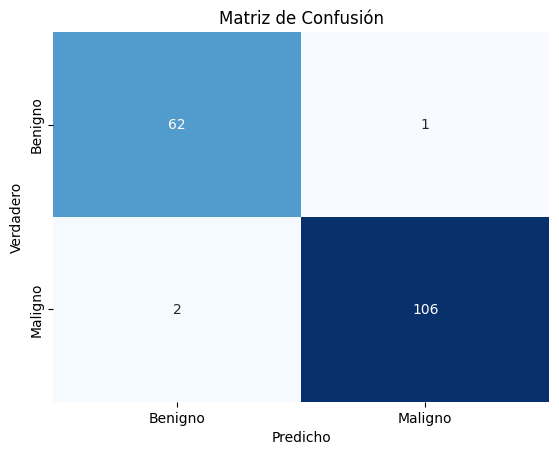

In [16]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Genera la matriz de confusión
cm = confusion_matrix(y_test,y_pred)

# Crea una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crea un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

# Añade etiquetas, título y elimina las marcas de verificación
ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['Benigno', 'Maligno'])
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])

plt.show()

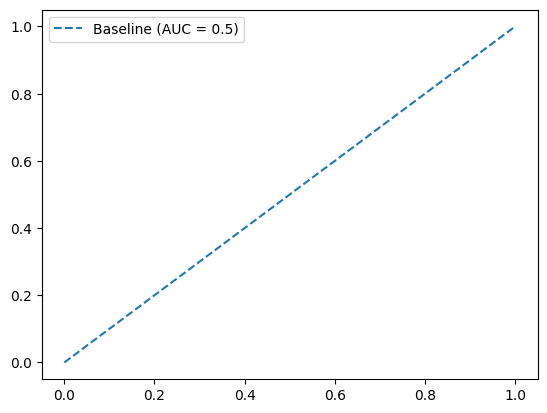

In [11]:
# Visualizar la curva ROC
roc_curve(y_test,y_pred)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Genera la matriz de confusión
cm = confusion_matrix(y_val, log_reg.predict(X_val))

# Crea una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crea un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

# Añade etiquetas, título y elimina las marcas de verificación
ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['Benigno', 'Maligno'])
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])

plt.show()

# Gradient Boosting

- A diferencia de AdaBoost, Gradient Boosting permite que cada predictor se ajuste a los **errores residuales** del predictor anterior.
- Ojo: Si bien, teóricamente es posible usar otros modelos con Gradient Boosting, la biblioteca de Scikit-Learn solo permite ser utilizada con Árboles de Decisión como predictor base.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



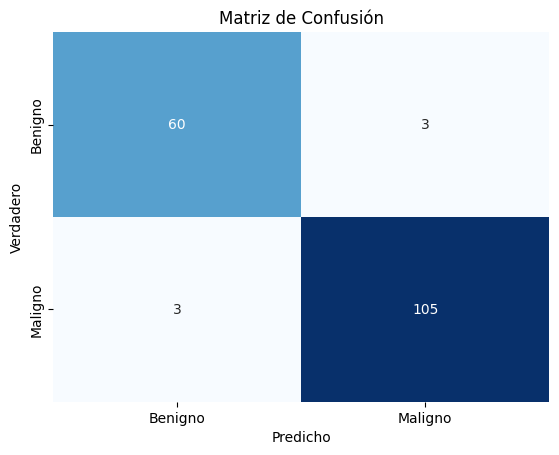

In [20]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Genera la matriz de confusión
cm = confusion_matrix(y_test,y_pred)

# Crea una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crea un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

# Añade etiquetas, título y elimina las marcas de verificación
ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['Benigno', 'Maligno'])
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])

plt.show()

# XGBoost vs LightGBM

- La popularidad de Gradient Boosting ha generado múltiples implementaciones dirigidas a optimizar el cálculo de entrenamiento.
- Dos implementaciones populares de Gradient Boosting en esta línea son **XGBoost** y **LightGBM**
- **XGBoost** (eXtreme Gradient Boosting) es un algoritmo de boosting para árboles de decisión que aplica **crecimiento por nivel** (level-wise growth), el cual prioriza el crecimiento **horizontal** de los árboles
- **LightGBM** (Light Gradient Boosting Machine) es un algoritmo de boosting para árboles de decisión que aplica **crecimiento por hojas** (leaf-wise tree growth), el cual prioriza el crecimiento **vertical** de los árboles.
- Tanto XGBoost como LightGBM tienen sus **propias bibliotecas**, por lo que es necesario instalarlas previo uso.

### Crecimiento por nivel vs crecimiento por hojas
<img src="images/lightgb_xgboostm.png" alt="" width="900px"/>
<br>
Fuente https://felipesulser.github.io/ashrae-kaggle/

In [21]:
%%time 
# Esta sentencia permite visualizar el tiempo de ejecución de una celda
# XGBoost (pip install xgboost)

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

CPU times: user 260 ms, sys: 210 ms, total: 470 ms
Wall time: 414 ms


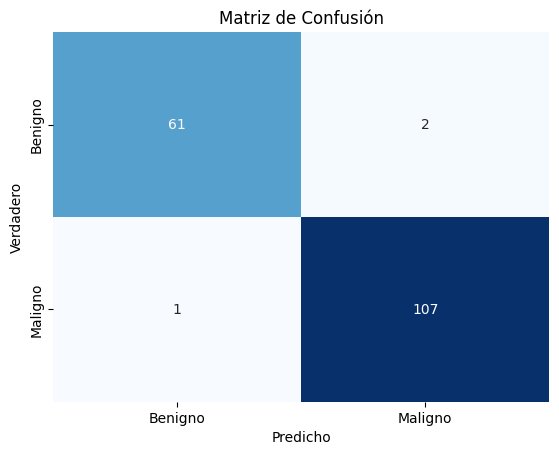

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Genera la matriz de confusión
cm = confusion_matrix(y_test,y_pred)

# Crea una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crea un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

# Añade etiquetas, título y elimina las marcas de verificación
ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['Benigno', 'Maligno'])
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])

plt.show()

In [23]:
%%time
# LightGBM (pip install lightgbm)

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train, y_train)
y_pred=lgbm.predict(X_test)
print(classification_report(y_test,y_pred))

ModuleNotFoundError: No module named 'lightgbm'

# Actividad 7

- Utilice nuevamente el dataset California Housing presente en los dataset de Scikit-Learn (enlace [aquí](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)) y utilice los algoritmos de boosting para regresión de datos. 
- Compare los resultados obtenidos para cada algoritmo utilizando distintas métricas

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.